In [4]:
import pandas as pd
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
recipes = pd.read_csv('/Users/giovannimaya/Downloads/epi_r-1 (1).csv')
target = recipes['cake']
feats = recipes.drop(columns=['cake'])
feats.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
numeric_cols = feats.select_dtypes(include=['number']).columns
medians = feats[numeric_cols].median()
titles = feats['title']
feats = feats[numeric_cols].fillna(medians)
feats.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,331.0,8.0,17.0,294.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


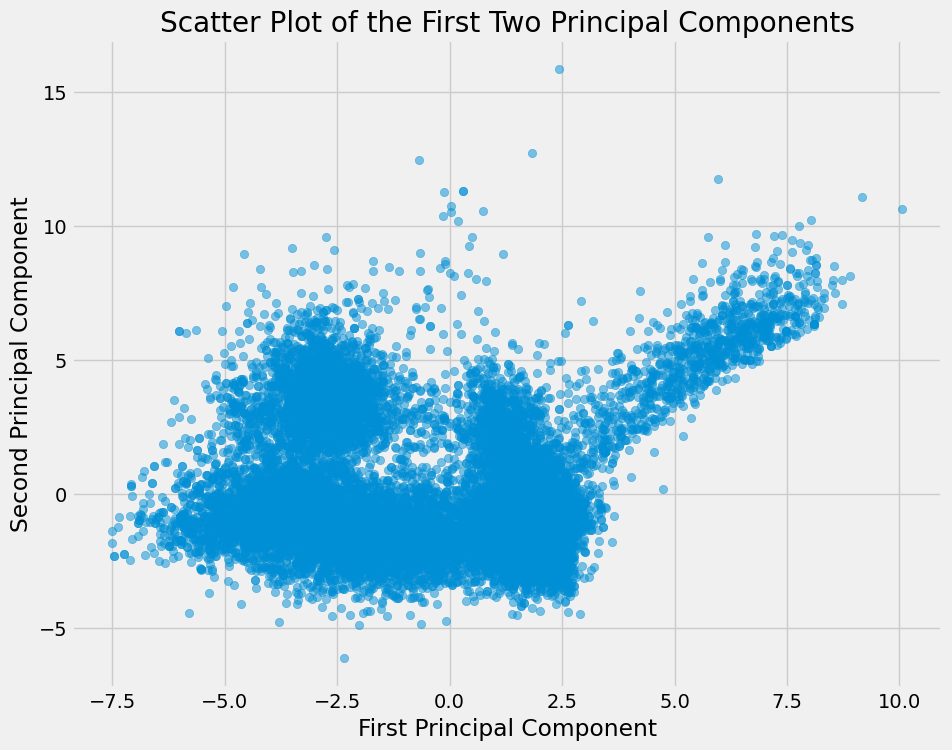

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_recipes = scaler.fit_transform(feats.select_dtypes(include=['number']))
pca = PCA()
pca.fit(scaled_recipes)
pca_data = pca.transform(scaled_recipes)
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

In [8]:
explain_var = pca.explained_variance_ratio_
cumul_var = np.cumsum(explain_var)
explain_var, cumul_var

(array([1.10066829e-02, 8.91426396e-03, 7.23082319e-03, 5.45246813e-03,
        5.32960953e-03, 4.81684300e-03, 4.39988817e-03, 4.02054839e-03,
        3.82701739e-03, 3.65605796e-03, 3.61213913e-03, 3.48079519e-03,
        3.41610198e-03, 3.38547533e-03, 3.34146539e-03, 3.29307704e-03,
        3.17674363e-03, 3.12991414e-03, 3.09132466e-03, 3.02941529e-03,
        3.01454070e-03, 2.97991370e-03, 2.94173688e-03, 2.89222042e-03,
        2.84936341e-03, 2.80069974e-03, 2.79753405e-03, 2.76736916e-03,
        2.75294316e-03, 2.73248033e-03, 2.70007311e-03, 2.69426581e-03,
        2.67170456e-03, 2.65911559e-03, 2.64392478e-03, 2.60305618e-03,
        2.59373509e-03, 2.57909259e-03, 2.57068249e-03, 2.55593063e-03,
        2.53634965e-03, 2.52914273e-03, 2.49449342e-03, 2.48577250e-03,
        2.47219976e-03, 2.45836688e-03, 2.44826809e-03, 2.42977015e-03,
        2.42858459e-03, 2.42425739e-03, 2.41361733e-03, 2.40656156e-03,
        2.39628852e-03, 2.37957022e-03, 2.36225659e-03, 2.356596

In [9]:
# ---- Q3 -----

In [10]:
np.logspace(-4, 4, 10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X = pca_data
y = recipes['cake']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression(penalty='l1', C=166.8, solver='saga', max_iter=10000)
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
auc

0.9615302678353718

In [14]:
auc

0.9674345384000035